- Spain is the european country with more delay hours per fly. (1)


- The Barcelona airport is the airport with less delays hours in Spain. (2)


- Vueling is the air carriers with more delays (3)


- The shorter the flight is, the more is likely that it will be delay. (4)


- The average delay time is Spain is longer than in Germany. (5)


Your are more likely to have a delay flight because of the carrier rather than from weather conditions.

Legacy carriers flights are less likely to be delay than low cost carriers flights.

US airlines are less likely to be delay than the european counterparts.

In [1]:
%matplotlib inline

import matplotlib.pyplot as plt
from matplotlib import style
import pandas as pd
import numpy as np
import os
from sqlalchemy import create_engine
import seaborn as sns
sns.set()

In [2]:
driver = 'mysql+pymysql:'
user = 'root'
password = '19693903'
ip = '127.0.0.1'
database = 'project_4'

In [3]:
connection_string = f'{driver}//{user}:{password}@{ip}/{database}'
engine = create_engine(connection_string)

In [4]:
query = """
SELECT *
FROM flights
"""

In [49]:
data = pd.read_sql(query, engine)


In [50]:
data.head()

,airln_name,airln_code,type,codeshared,status,icaonumb,flight,depart_terminal,depart_gate,depart_airpt,schd_depart_time,depart_delay,arri_airpt,schd_arri_time,arri_delay
0,Binter Canarias,NT,departure,None,landed,IBB503,503,2,3,ACE,2019-07-25 07:00:00,0,LPA,2019-07-25 07:45:00,0
1,Ryanair,FR,departure,None,landed,RYR1345,1345,1,2,ACE,2019-07-25 07:45:00,0,SNN,2019-07-25 11:40:00,0
2,Binter Canarias,NT,departure,None,landed,IBB501,501,2,4,ACE,2019-07-25 08:15:00,0,LPA,2019-07-25 09:00:00,0
3,Ryanair,FR,departure,None,landed,RYR3547,3547,1,4,ACE,2019-07-25 08:20:00,0,MAD,2019-07-25 11:55:00,0
4,Binter Canarias,NT,departure,Canarias Airlines,landed,IBB453,453,2,3,ACE,2019-07-25 08:25:00,0,TFN,2019-07-25 09:15:00,0


In [7]:
### Deleate duplicates

data = data.drop_duplicates(subset = ['flight','depart_terminal','schd_depart_time', 'depart_delay', \
                              'schd_arri_time', 'arri_delay'], keep='first')

In [51]:
data = data.astype({'depart_delay': int,'arri_delay':int})

In [8]:
style.use('seaborn-notebook')

In [52]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12181 entries, 0 to 12180
Data columns (total 15 columns):
airln_name          12181 non-null object
airln_code          12181 non-null object
type                12181 non-null object
codeshared          7914 non-null object
status              12181 non-null object
icaonumb            12121 non-null object
flight              12181 non-null object
depart_terminal     8844 non-null object
depart_gate         9664 non-null object
depart_airpt        12181 non-null object
schd_depart_time    12180 non-null datetime64[ns]
depart_delay        12181 non-null int64
arri_airpt          12181 non-null object
schd_arri_time      12180 non-null datetime64[ns]
arri_delay          12181 non-null int64
dtypes: datetime64[ns](2), int64(2), object(11)
memory usage: 1.4+ MB


### Visualizing the relation between my numerical random variables

## Ploting the frequency of the delays in minutes

In [53]:
df_delays = data[['depart_delay', 'arri_delay']]

In [54]:
df_delays.head()

,depart_delay,arri_delay
0,0,0
1,0,0
2,0,0
3,0,0
4,0,0


In [55]:
df_delays =  df_delays[np.logical_and(df_delays['depart_delay']>0, df_delays['arri_delay']>0)]

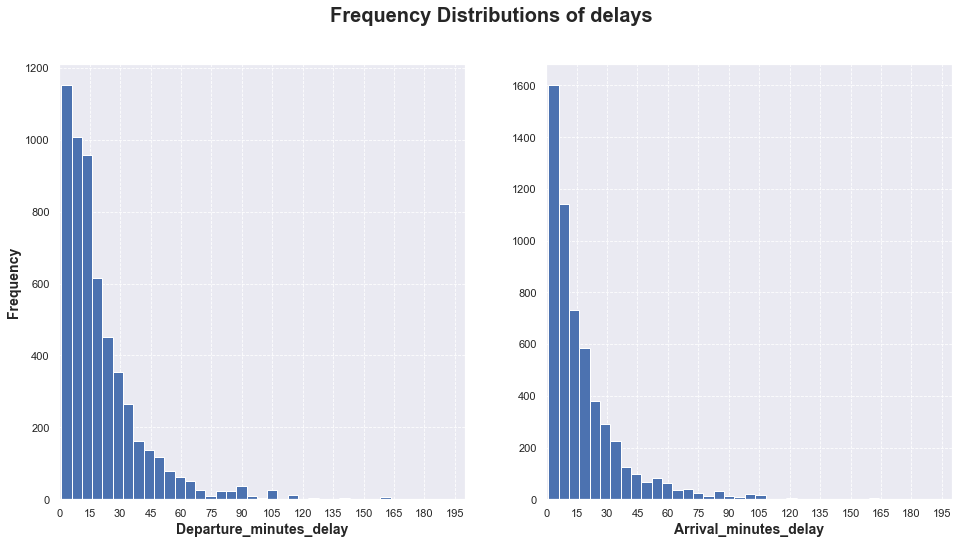

In [56]:
fig, [ax1, ax2] = plt.subplots(1,2, figsize=[16,8])
fig.subplots_adjust(hspace=0.5)
fig.suptitle('Frequency Distributions of delays', fontweight = 900, fontsize = 20)

ax1.hist(df_delays.depart_delay,bins=40)
ax1.set_xlabel('Departure_minutes_delay',fontweight = 900, fontsize = 14)
ax1.set_ylabel('Frequency',fontweight = 900, fontsize = 14)
ax1.grid(linestyle='--', linewidth=0.8)
ax1.set_xlim([0, 200])

ax1.set_xticks(np.arange(0, 200,15))

ax2.hist(df_delays.arri_delay, bins=40)
ax2.set_xlabel('Arrival_minutes_delay',fontweight = 900, fontsize = 14)
ax2.grid(linestyle='--', linewidth=0.8)
ax2.set_xlim([0, 200])

ax2.set_xticks(np.arange(0, 200,15))

plt.show()

### Plotting the summary statistics of the delay variable

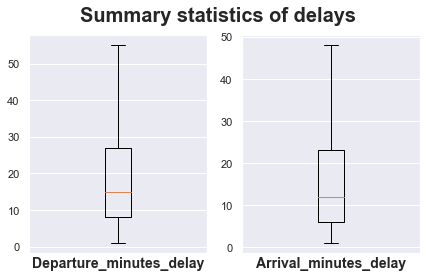

In [57]:
fig, [ax1, ax2] = plt.subplots(1,2, figsize=[7,4])
fig.subplots_adjust(hspace=0.5)
fig.suptitle('Summary statistics of delays', fontweight = 900, fontsize = 20)

ax1.boxplot(df_delays.depart_delay, bootstrap=10000, meanline = True,showfliers=False)
ax1.set_xlabel('Departure_minutes_delay',fontweight = 900, fontsize = 14)
ax1.set_xticks([])

ax2.boxplot(df_delays.arri_delay, bootstrap=10000, meanline = True,showfliers=False)
ax2.set_xlabel('Arrival_minutes_delay',fontweight = 900, fontsize = 14)
ax2.set_xticks([])

plt.show()

In [58]:
depart_hours = data['schd_depart_time'].dt.hour
arri_hours = data['schd_arri_time'].dt.hour

/Users/abreualberto91/anaconda3/envs/ironhack/lib/python3.7/site-packages/numpy/lib/histograms.py:824: RuntimeWarning: invalid value encountered in greater_equal
  keep = (tmp_a >= first_edge)
/Users/abreualberto91/anaconda3/envs/ironhack/lib/python3.7/site-packages/numpy/lib/histograms.py:825: RuntimeWarning: invalid value encountered in less_equal
  keep &= (tmp_a <= last_edge)


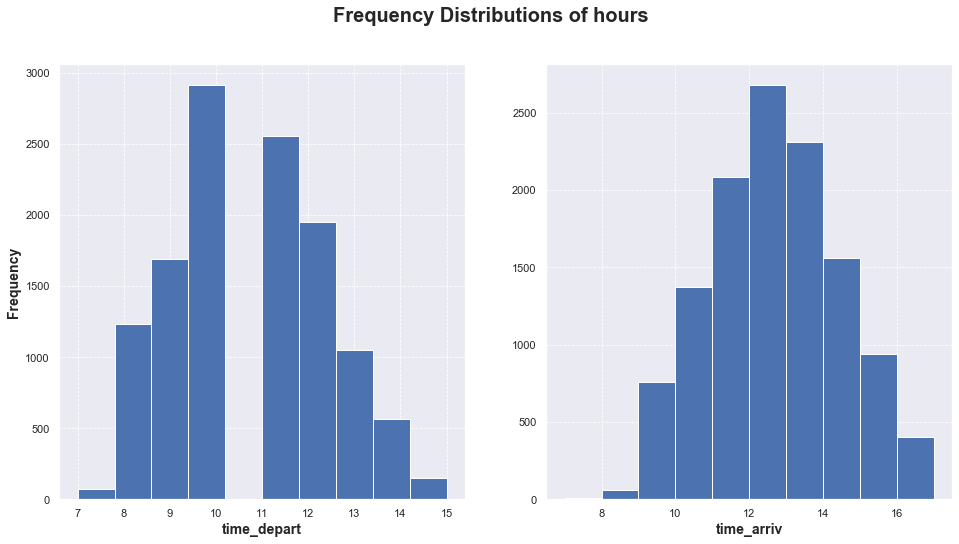

In [59]:
fig, [ax1, ax2] = plt.subplots(1,2, figsize=[16,8])
fig.subplots_adjust(hspace=0.5)
fig.suptitle('Frequency Distributions of hours', fontweight = 900, fontsize = 20)

ax1.hist(depart_hours)
ax1.set_xlabel('time_depart',fontweight = 900, fontsize = 14)
ax1.set_ylabel('Frequency',fontweight = 900, fontsize = 14)
ax1.grid(linestyle='--', linewidth=0.8)



ax2.hist(arri_hours)
ax2.set_xlabel('time_arriv',fontweight = 900, fontsize = 14)
ax2.grid(linestyle='--', linewidth=0.8)



plt.show()

0        7.0
1        7.0
2        8.0
3        8.0
4        8.0
6        8.0
7        8.0
8        9.0
10       9.0
11      10.0
12      10.0
13      11.0
14      11.0
16      11.0
17      12.0
18       8.0
19       9.0
20      12.0
21       9.0
22       9.0
23       9.0
25      12.0
26       9.0
27       9.0
28       9.0
29       9.0
30       9.0
31       9.0
32       9.0
33       9.0
        ... 
6364     9.0
6365     9.0
6366     9.0
6367     9.0
6368     9.0
6369     9.0
6370     9.0
6371     9.0
6372     9.0
6373    10.0
6374    10.0
6375    10.0
6376    10.0
6377    10.0
6378     9.0
6379    10.0
6381    10.0
6382    10.0
6383    10.0
6384     9.0
6385     9.0
6386    10.0
6387    10.0
6388     9.0
6389    10.0
6390    10.0
6391    10.0
6392    11.0
6393    11.0
6394    11.0
Name: schd_depart_time, Length: 5908, dtype: float64